<a href="https://colab.research.google.com/github/wigeonhui/2021_PNUAC_AIData/blob/main/04_pandas_02_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataFrame**
+ 2차원 자료구조인 DataFrame는 행과 열이 있는 테이블 데이터


## **pandas 라이브러리 추가**

In [2]:
import pandas as pd

## 데이터프레임으로 변환
* **pd.DataFrame()**

###  리스트를 데이터프레임으로 변환

In [11]:
area = ['서울',	'부산',	'대구',	'인천',	'광주',	'대전',	'울산',	'세종',	'경기',	'강원',	'충북',	'충남',	'전북',	'전남',	'경북',	'경남',	'제주']
pm25_avg = [20,13,15,20,19,16,14,18,20,14,19,23,23,14,15,13,14]
pm25_max = [22,18,18,30,23,20,16,19,27,18,26,29,30,27,23,17,16]
pm25_min = [16,10,11,12,15,12,11,17,13,9,14,19,14,10,8,9,11]

In [12]:
#데이터 프레임 생성하기
df = pd.DataFrame()
df['지역'] = area
df['평균'] = pm25_avg
df['최대'] = pm25_max
df['최소'] = pm25_min

df

,지역,평균,최대,최소
0,서울,20,22,16
1,부산,13,18,10
2,대구,15,18,11
3,인천,20,30,12
4,광주,19,23,15
5,대전,16,20,12
6,울산,14,16,11
7,세종,18,19,17
8,경기,20,27,13
9,강원,14,18,9


In [13]:
df['지역']

0     서울
1     부산
2     대구
3     인천
4     광주
5     대전
6     울산
7     세종
8     경기
9     강원
10    충북
11    충남
12    전북
13    전남
14    경북
15    경남
16    제주
Name: 지역, dtype: object

In [7]:
type(df['지역'])

pandas.core.series.Series

## 외부 데이터 가져오기
+ csv 읽기
 - 한글 파일명을 사용할 경우 : df = pd.read_csv(‘파일명‘, engine='python')
 - 파일 내용 한글이 깨지는 경우 : df = pd.read_csv(‘파일명‘, engine='python', encoding='cp949')
>
```
df = pd.read_csv(‘파일명‘)
```

+ 엑셀 읽기
 - 한글 파일명을 사용할 경우 : df = pd.read_excel(‘파일명‘)
>
```
df = pd.pd.read_excel(‘파일명‘)
```

In [12]:
#지역별주간별_초미세먼지.csv 자료 가져오기
df = pd.read_csv('/content/구글드라이브경로/2021_PNUAC_AIData/data/지역별주간별_초미세먼지.csv', engine= 'python', encoding='cp949')
df

,지역,주간평균,최고값,최저값
0,서울,20,22,16
1,부산,13,18,10
2,대구,15,18,11
3,인천,20,30,12
4,광주,19,23,15
5,대전,16,20,12
6,울산,14,16,11
7,세종,18,19,17
8,경기,20,27,13
9,강원,14,18,9


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터프레임(DataFrame) 살펴보기
* 데이터프레임의 정보 : **df.info()**
 - 데이터프레임에 대한 전반적인 정보
 - 데이터프레임을 구성하는 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등을 출력
+ 데이터프레임의 크기 확인 : **df.shape 속성**
 - (행, 열) 크기를 확인하기
 - 행의 개수 : len(데이터프레임), len(.index), .shape[0]
 - 열의 개수 : len(.column), .shape[1]
+ 데이터프레임의 원소의 총개수 : **df.size 속성**
+ 데이터프레임 개수 확인 :**df.count()**
 - Null이 아닌 행의 개수 확인
 - axis='columns' : Null이 아닌 열의 개수 확인
* 데이터프레임의 인덱스 
 + 열의 인덱스 : **df.colums**
 + 행의 인덱스 : **df.index**
 + **데이터프레임의 인덱스 변경**
   - 열인덱스 명 변경 : df.column = [열명인덱스]
   - 열항목 중 하나를 인덱스로 사용 : df.set_index(열명)
   - 인덱스를 일반 데이터 열로 전환 : df.reset_index()

In [13]:
#데이터프레임의 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   주간평균    17 non-null     int64 
 2   최고값     17 non-null     int64 
 3   최저값     17 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 672.0+ bytes


In [15]:
#데이터프레임의 크기 확인
print('데이터프레임 (행, 열) : ', df.shape)
print('데이터프레임 행 개수 len : ', len(df))
print('데이터프레임 행 개수 len : ', len(df.index))
print('데이터프레임 행 개수 shape : ', df.shape[0])
print('데이터프레임 열 개수 len : ', len(df.columns))
print('데이터프레임 열 개수 shape : ', df.shape[1])

데이터프레임 (행, 열) :  (17, 4)
데이터프레임 행 개수 len :  17
데이터프레임 행 개수 len :  17
데이터프레임 행 개수 shape :  17
데이터프레임 열 개수 len :  4
데이터프레임 열 개수 shape :  4


In [18]:
#데이터프레임 각 열의개수 확인
print(df.count())
print('-'*20) 
print(df.count(axis=1))

지역       17
주간평균     17
최고값      17
최저값      17
dtype: int64
--------------------
0     4
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    4
13    4
14    4
15    4
16    4
dtype: int64


In [19]:
#데이터프레임의 원소의 총개수
print(df.size)

68


In [20]:
#데이터프레임의 인덱스
print('열인덱스 : ', df.columns)
print('행인덱스 :',df.index)

열인덱스 :  Index(['지역 ', '주간평균 ', '최고값 ', '최저값 '], dtype='object')
행인덱스 : RangeIndex(start=0, stop=17, step=1)


In [21]:
#각 문자열 요소에서 공백 제거
lt = ['지역 ', '주간평균 ', '최고값 ', '최저값 ']
lt = [item.strip() for item in lt]
lt

['지역', '주간평균', '최고값', '최저값']

In [22]:
df['지역 ']

0     서울
1     부산
2     대구
3     인천
4     광주
5     대전
6     울산
7     세종
8     경기
9     강원
10    충북
11    충남
12    전북
13    전남
14    경북
15    경남
16    제주
Name: 지역 , dtype: object

In [23]:
#열명의 공백 제거 
df.columns = [item.strip() for item in df.columns]
df.columns

Index(['지역', '주간평균', '최고값', '최저값'], dtype='object')

In [24]:
df['지역']

0     서울
1     부산
2     대구
3     인천
4     광주
5     대전
6     울산
7     세종
8     경기
9     강원
10    충북
11    충남
12    전북
13    전남
14    경북
15    경남
16    제주
Name: 지역, dtype: object

In [25]:
#지역 컬럼을 행 인덱스로 지정
df = df.set_index('지역')
df

,주간평균,최고값,최저값
지역,,,
서울,20,22,16
부산,13,18,10
대구,15,18,11
인천,20,30,12
광주,19,23,15
대전,16,20,12
울산,14,16,11
세종,18,19,17
경기,20,27,13


In [26]:
df.index

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주'],
      dtype='object', name='지역')

In [27]:
#인덱스를 일반 데이터 열로 전환
df = df.reset_index()
df

,지역,주간평균,최고값,최저값
0,서울,20,22,16
1,부산,13,18,10
2,대구,15,18,11
3,인천,20,30,12
4,광주,19,23,15
5,대전,16,20,12
6,울산,14,16,11
7,세종,18,19,17
8,경기,20,27,13
9,강원,14,18,9


## **데이터프레임 인덱싱(indexing)과 슬라이싱(slicing)**


In [28]:
df = df.set_index('지역')
df.head()

,주간평균,최고값,최저값
지역,,,
서울,20,22,16
부산,13,18,10
대구,15,18,11
인천,20,30,12
광주,19,23,15


### df[]
 + 특정 열 가져오기 : df[열인덱스], df[열인덱스 리스트]
 + 특정 행 가져오기 : df[시작행인덱스:종료행인덱스]  

In [29]:
#특정 열(주간평균) 가져오기
df['주간평균']

지역
서울    20
부산    13
대구    15
인천    20
광주    19
대전    16
울산    14
세종    18
경기    20
강원    14
충북    19
충남    23
전북    23
전남    14
경북    15
경남    13
제주    14
Name: 주간평균, dtype: int64

In [31]:
##특정 열(주간평균, 최저값) 가져오기
df[['주간평균','최저값']]

,주간평균,최저값
지역,,
서울,20,16
부산,13,10
대구,15,11
인천,20,12
광주,19,15
대전,16,12
울산,14,11
세종,18,17
경기,20,13


In [32]:
#특정행(부산에서 인천까지) 가져오기
df['부산':'인천']

,주간평균,최고값,최저값
지역,,,
부산,13,18,10
대구,15,18,11
인천,20,30,12


### df.loc[행인덱스, 열인덱스]
* 특정 열 가져오기 : df.loc[:, 열인덱스]
* 특정 행 가져오기 : df.loc[행인덱스, :]
* 특정 항목 가져오기 : df.loc[행인덱스, 열인덱스]

In [33]:
df['최저값']

지역
서울    16
부산    10
대구    11
인천    12
광주    15
대전    12
울산    11
세종    17
경기    13
강원     9
충북    14
충남    19
전북    14
전남    10
경북     8
경남     9
제주    11
Name: 최저값, dtype: int64

In [39]:
#loc 메소드로 특정 열(최저값) 가져오기
df.loc[:, '최저값']

지역
서울    16
부산    10
대구    11
인천    12
광주    15
대전    12
울산    11
세종    17
경기    13
강원     9
충북    14
충남    19
전북    14
전남    10
경북     8
경남     9
제주    11
Name: 최저값, dtype: int64

In [41]:
#loc 메소드로 특정 열(최저값) 가져와서 메소드를 사용하여 데이터프레임으로 변환
df.loc[:, '최저값'].to_frame()

,최저값
지역,
서울,16
부산,10
대구,11
인천,12
광주,15
대전,12
울산,11
세종,17
경기,13


In [42]:
#loc 메소드로 특정 열(최저값) 가져와서 메소드 없이 데이터프레임으로 변환
df.loc[:, ['최저값']]

,최저값
지역,
서울,16
부산,10
대구,11
인천,12
광주,15
대전,12
울산,11
세종,17
경기,13


In [38]:
#loc 메소드로 특정 열(주간평균, 최저값) 가져오기
df.loc[:, ['주간평균','최저값']]

,주간평균,최저값
지역,,
서울,20,16
부산,13,10
대구,15,11
인천,20,12
광주,19,15
대전,16,12
울산,14,11
세종,18,17
경기,20,13


In [44]:
#loc 메소드로 특정 열(주간평균에서 최저값까지) 가져오기
df.loc[:, '주간평균':'최저값']

,주간평균,최고값,최저값
지역,,,
서울,20,22,16
부산,13,18,10
대구,15,18,11
인천,20,30,12
광주,19,23,15
대전,16,20,12
울산,14,16,11
세종,18,19,17
경기,20,27,13


In [46]:
#특정 행(부산) 가져오기
df.loc[['부산'] ,:]

,주간평균,최고값,최저값
지역,,,
부산,13,18,10


In [47]:
#특정 행(부산, 인천) 가져오기
df.loc[['부산','인천'], :]

,주간평균,최고값,최저값
지역,,,
부산,13,18,10
인천,20,30,12


In [48]:
#특정 행(부산에서 인천까지) 가져오기
df.loc['부산':'인천', :]

,주간평균,최고값,최저값
지역,,,
부산,13,18,10
대구,15,18,11
인천,20,30,12


In [49]:
#특정 항목(부산의 주간평균) 가져오기
df.loc['부산', '주간평균']

13

In [50]:
#특정 항목(부산과 인천의 주간평균과 최저값) 가져오기
df.loc[['부산','인천'],['주간평균','최저값']]

,주간평균,최저값
지역,,
부산,13,10
인천,20,12


In [51]:
#특정 항목(부산에서 인천까지의 주간평균에서 최저값까지) 가져오기
df.loc['부산':'인천', '주간평균':'최저값']

,주간평균,최고값,최저값
지역,,,
부산,13,18,10
대구,15,18,11
인천,20,30,12


### df.iloc[행인덱스순서, 열인덱스순서]
* 특정 열 가져오기 : df.loc[:, 열인덱스순서]
* 특정 행 가져오기 : df.loc[행인덱스순서, :]
* 특정 항목 가져오기 : df.loc[행인덱스순서, 열인덱스순서]

In [52]:
#특정 열 가져오기
#df.loc[:, '최저값'] 
#iloc로 변경
df.iloc[:, 2]

지역
서울    16
부산    10
대구    11
인천    12
광주    15
대전    12
울산    11
세종    17
경기    13
강원     9
충북    14
충남    19
전북    14
전남    10
경북     8
경남     9
제주    11
Name: 최저값, dtype: int64

In [54]:
#df.loc[:, ['주간평균', '최저값']]
#iloc로 변경
df.iloc[:, [0, 2]]

,주간평균,최저값
지역,,
서울,20,16
부산,13,10
대구,15,11
인천,20,12
광주,19,15
대전,16,12
울산,14,11
세종,18,17
경기,20,13


In [55]:
#df.loc[:, '주간평균':'최저값']
#iloc로 변경
df.iloc[:, 0:2]

,주간평균,최고값
지역,,
서울,20,22
부산,13,18
대구,15,18
인천,20,30
광주,19,23
대전,16,20
울산,14,16
세종,18,19
경기,20,27


In [56]:
#특정 행 가져오기
#df.loc['부산',:]
#iloc로 변경
df.iloc[1,:]

주간평균    13
최고값     18
최저값     10
Name: 부산, dtype: int64

In [57]:
#df.loc[['부산', '인천'], :]
#iloc로 변경
df.iloc[[1, 3],:]

,주간평균,최고값,최저값
지역,,,
부산,13,18,10
인천,20,30,12


In [58]:
#df.loc['부산':'인천', :]
#iloc로 변경
df.iloc[1:4, :]

,주간평균,최고값,최저값
지역,,,
부산,13,18,10
대구,15,18,11
인천,20,30,12


In [59]:
#특정 항목 가져오기
#df.loc['부산', '주간평균']
#iloc로 변경
df.iloc[1,0]

13

In [62]:
#df.loc[['부산','인천'],['주간평균', '최저값']]
#iloc로 변경
df.iloc[[0,3],[0,2]]

,주간평균,최저값
지역,,
서울,20,16
인천,20,12


In [63]:
#df.loc['부산':'인천','주간평균':'최저값']
#iloc로 변경
df.iloc[1:4, 0:3]

,주간평균,최고값,최저값
지역,,,
부산,13,18,10
대구,15,18,11
인천,20,30,12


## **데이터프레임(DataFrame) 기본 조회와 기초 통계 메소드**
* head(n) : 상위 n개 조회, n생략 시 5개 조회
+ tail(n) : 하위 n개 조회, n생략 시 5개 조회
+ describe() : 요약 통계량 계산
+ mean() : 평균
+ max() : 최대
+ min() : 최소
+ std()  : 표준편차

In [64]:
df.head(2)

,주간평균,최고값,최저값
지역,,,
서울,20,22,16
부산,13,18,10


In [65]:
df.tail(2)

,주간평균,최고값,최저값
지역,,,
경남,13,17,9
제주,14,16,11


In [66]:
df.describe()

,주간평균,최고값,최저값
count,17.000000,17.000000,17.000000
mean,17.058824,22.294118,12.411765
std,3.399827,5.009550,3.063063
min,13.000000,16.000000,8.000000
25%,14.000000,18.000000,10.000000
50%,16.000000,22.000000,12.000000
75%,20.000000,27.000000,14.000000
max,23.000000,30.000000,19.000000


## 자주사용되는 메소드
+ 행열 전환 : df.T
+ 정렬
 - 행열 인덱스 정렬 : df.sort_index(axis=n), n생략 또는 0:행, 1:열
 - 행렬 값 정렬 : df.sort_values()

In [14]:
df

,지역,평균,최대,최소
0,서울,20,22,16
1,부산,13,18,10
2,대구,15,18,11
3,인천,20,30,12
4,광주,19,23,15
5,대전,16,20,12
6,울산,14,16,11
7,세종,18,19,17
8,경기,20,27,13
9,강원,14,18,9


In [68]:
#행과 열 바꾸기
df.T

지역,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
주간평균,20,13,15,20,19,16,14,18,20,14,19,23,23,14,15,13,14
최고값,22,18,18,30,23,20,16,19,27,18,26,29,30,27,23,17,16
최저값,16,10,11,12,15,12,11,17,13,9,14,19,14,10,8,9,11


In [8]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
 
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

import warnings
warnings.filterwarnings('ignore')

In [17]:
#주간별 지역별주간별_초미세먼지.csv 데이터 가져오기
df = pd.read_csv('/content/구글드라이브경로/2021_PNUAC_AIData/data/지역별주간별_초미세먼지.csv', engine='python', encoding='cp949')
df

,지역,주간평균,최고값,최저값
0,서울,20,22,16
1,부산,13,18,10
2,대구,15,18,11
3,인천,20,30,12
4,광주,19,23,15
5,대전,16,20,12
6,울산,14,16,11
7,세종,18,19,17
8,경기,20,27,13
9,강원,14,18,9


In [22]:
#지역으로 인덱스 변경
df = df.set_index('지역 ')

KeyError: ignored

In [21]:
df.head()

,주간평균,최고값,최저값
지역,,,
서울,20,22,16
부산,13,18,10
대구,15,18,11
인천,20,30,12
광주,19,23,15


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


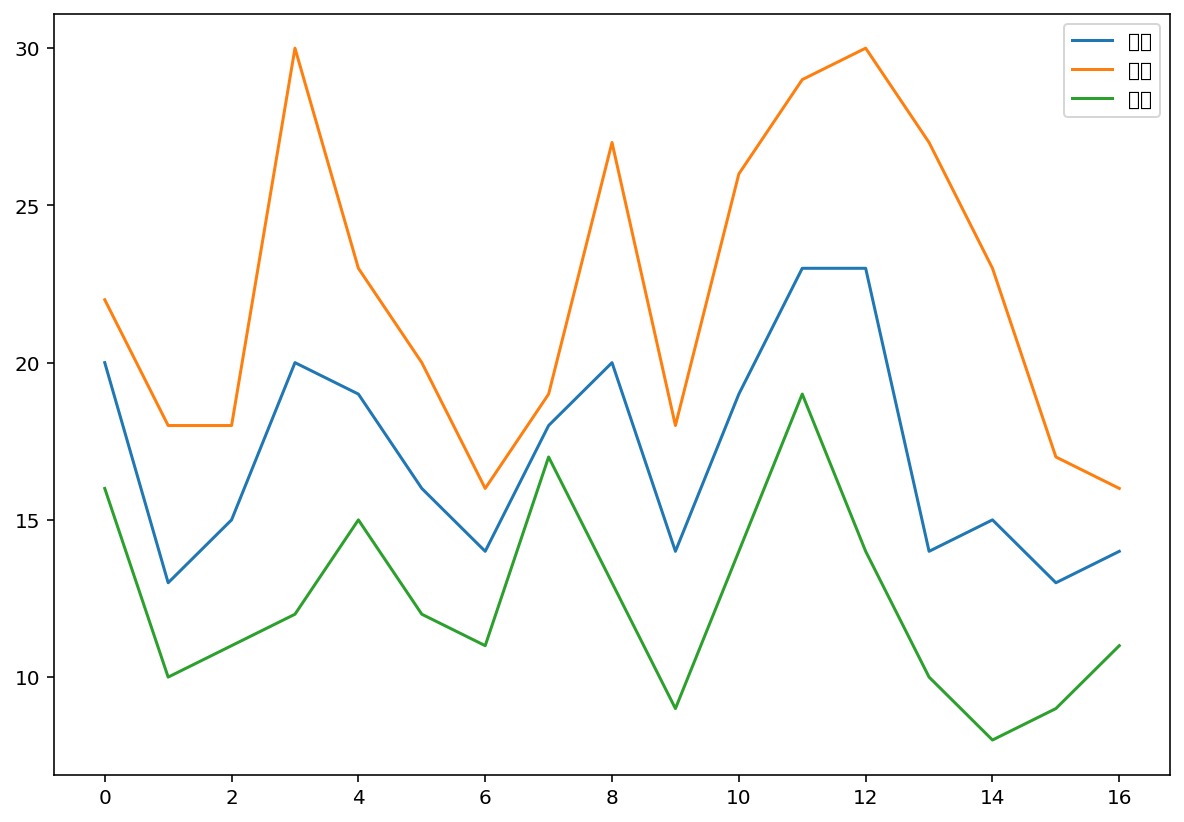

In [16]:
#데이터 프레임 그래프 그리기
df.plot(figsize=(10,7))
plt.show()